## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Introducción al dataset

Para este proyecto vamos a trabajar con un dataset el cual contiene 3 folders, uno de entrenamiento, otro de pruebas y otro más de validación.

En total tenemos 5,863 radiografías las cuales pertenecen a 2 categorías (Pulmones normales/ Pulmones con Neumonía).

Las imagenes pertenecen a pacientes pedriáticos de 1 a 5 años de edad del Centro Médico de Mujeres y Niños de Guangzhou, China.

Para empezar a comprender nuestro objecto de estudio, es necesario describirlo.

**¿Qué es la neumonía?**

La neumonía es una infección que inflama los sacos aéreos de uno o ambos pulmones. Los sacos aéreos se pueden llenar de líquido o pus (material purulento), lo que provoca tos con flema o pus, fiebre, escalofríos y dificultad para respirar. Diversos microrganismos, como bacterias, virus y hongos, pueden provocar neumonía.

La neumonía puede variar en gravedad desde suave a potencialmente mortal. Es más grave en bebés y niños pequeños, personas mayores a 65 años, y personas con problemas de salud o sistemas inmunitarios debilitados.

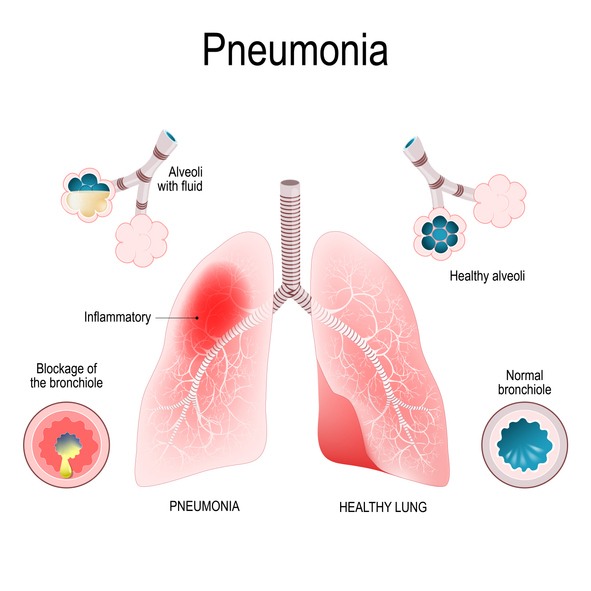

# Carga del dataset

Para este proyecto vamos a trabajar con el dataset de las radiografías para detectar si un paciente tiene neumonía o no.


In [2]:
#importamos las librerías necesarias
import os
import cv2
import keras
import itertools
import numpy as np
import tensorflow as tf
from PIL import Image
from time import time
from glob import glob
from tqdm import tqdm
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten
from matplotlib import pyplot as plt
plt.style.use('ggplot')

2023-07-07 10:46:23.851071: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 10:46:23.895496: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 10:46:24.141733: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 10:46:24.143460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 10:46:25.419824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

ModuleNotFoundError: No module named 'google.colab'

A continuación vamos a descargar el dataset directamente de la API de Kaggle y lo guardaremos directamente en nuestro entorno de desarrollo.

Para que los siguientes pasos funcionen correctamente, es necesario seguir las instrucciones en el **READ ME**

In [ ]:
# Install the kaggle client for directly downloading the dataset to colab
%pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosagv","key":"1dce1f89160524a3eaf704f127309112"}'}

In [ ]:
# Download the chest-xray-pneumonia-dataset to the colab environment
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'paultimothymooney/chest-xray-pneumonia'
!mkdir chest_xray_pneumonia
!unzip chest-xray-pneumonia.zip -d chest_xray_pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_pneumonia/chest_xray/train/NORMAL/IM-0442-

In [ ]:
#Funciones para graficar

def visualize_dataset_distribution(dataset: dict, x_label: str, y_label: str, title: str):
  folders = list(dataset.keys())
  folders_vals = list(map(lambda x: len(dataset[x]), folders))
  folders_paths = ['_'.join(x.split("/")[-2:]) for x in folders]
  for idx, f in enumerate(folders_paths):
    print('{}: contiene {} imágenes'.format(folders_paths[idx], folders_vals[idx]))
  plt.bar(folders_paths, folders_vals, width = 0.5, color = 'blue', align = 'center', edgecolor = 'black')
  plt.xticks(rotation=70)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title("Distribución de las imágenes dentro del dataset")
  plt.show()

def plot_confusion_matrix_self(cm, classes, title, cmap):
  plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.ylabel(ylabel = 'True label', labelpad = 25)
  plt.xlabel(xlabel = 'Predicted label', labelpad = 25)
  plt.show()

In [ ]:
# Separación de las imágenes en variables, para posteriormente agregarlas a un objeto.
path = "/content/chest_xray_pneumonia/chest_xray"
train_NORMAL = os.path.join(path, 'train/NORMAL')
train_PNEUMONIA = os.path.join(path, 'train/PNEUMONIA')
test_NORMAL = os.path.join(path, 'test/NORMAL')
test_PNEUMONIA = os.path.join(path, 'test/PNEUMONIA')
val_NORMAL = os.path.join(path, 'val/NORMAL')
val_PNEUMONIA = os.path.join(path, 'val/PNEUMONIA')
train_NORMAL_DIR = [os.path.join(train_NORMAL, x) for x in os.listdir(train_NORMAL)]
train_PNEUMONIA_DIR = [os.path.join(train_PNEUMONIA, x) for x in os.listdir(train_PNEUMONIA)]
test_NORMAL_DIR = [os.path.join(test_NORMAL, x) for x in os.listdir(test_NORMAL)]
test_PNEUMONIA_DIR = [os.path.join(test_PNEUMONIA, x) for x in os.listdir(test_PNEUMONIA)]
val_NORMAL_DIR = [os.path.join(val_NORMAL, x) for x in os.listdir(val_NORMAL)]
val_PNEUMONIA_DIR = [os.path.join(val_PNEUMONIA, x) for x in os.listdir(val_PNEUMONIA)]

dataset = {
    "train_NORMAL":train_NORMAL_DIR,
    "train_PNEUMONIA":train_PNEUMONIA_DIR[:1500],
    "test_NORMAL":test_NORMAL_DIR,
    "test_PNEUMONIA":test_PNEUMONIA_DIR,
    "val_NORMAL":val_NORMAL_DIR,
    "val_PNEUMONIA":val_PNEUMONIA_DIR
}

Ya contamos con las imagenes cargadas en un objeto llamado **dataset**.

Visualizaremos las primeras imágenes en los conjuntos de prueba y entrenamiento.

In [ ]:
samples = dataset['test_NORMAL'][:5] + dataset['test_PNEUMONIA'][:5]

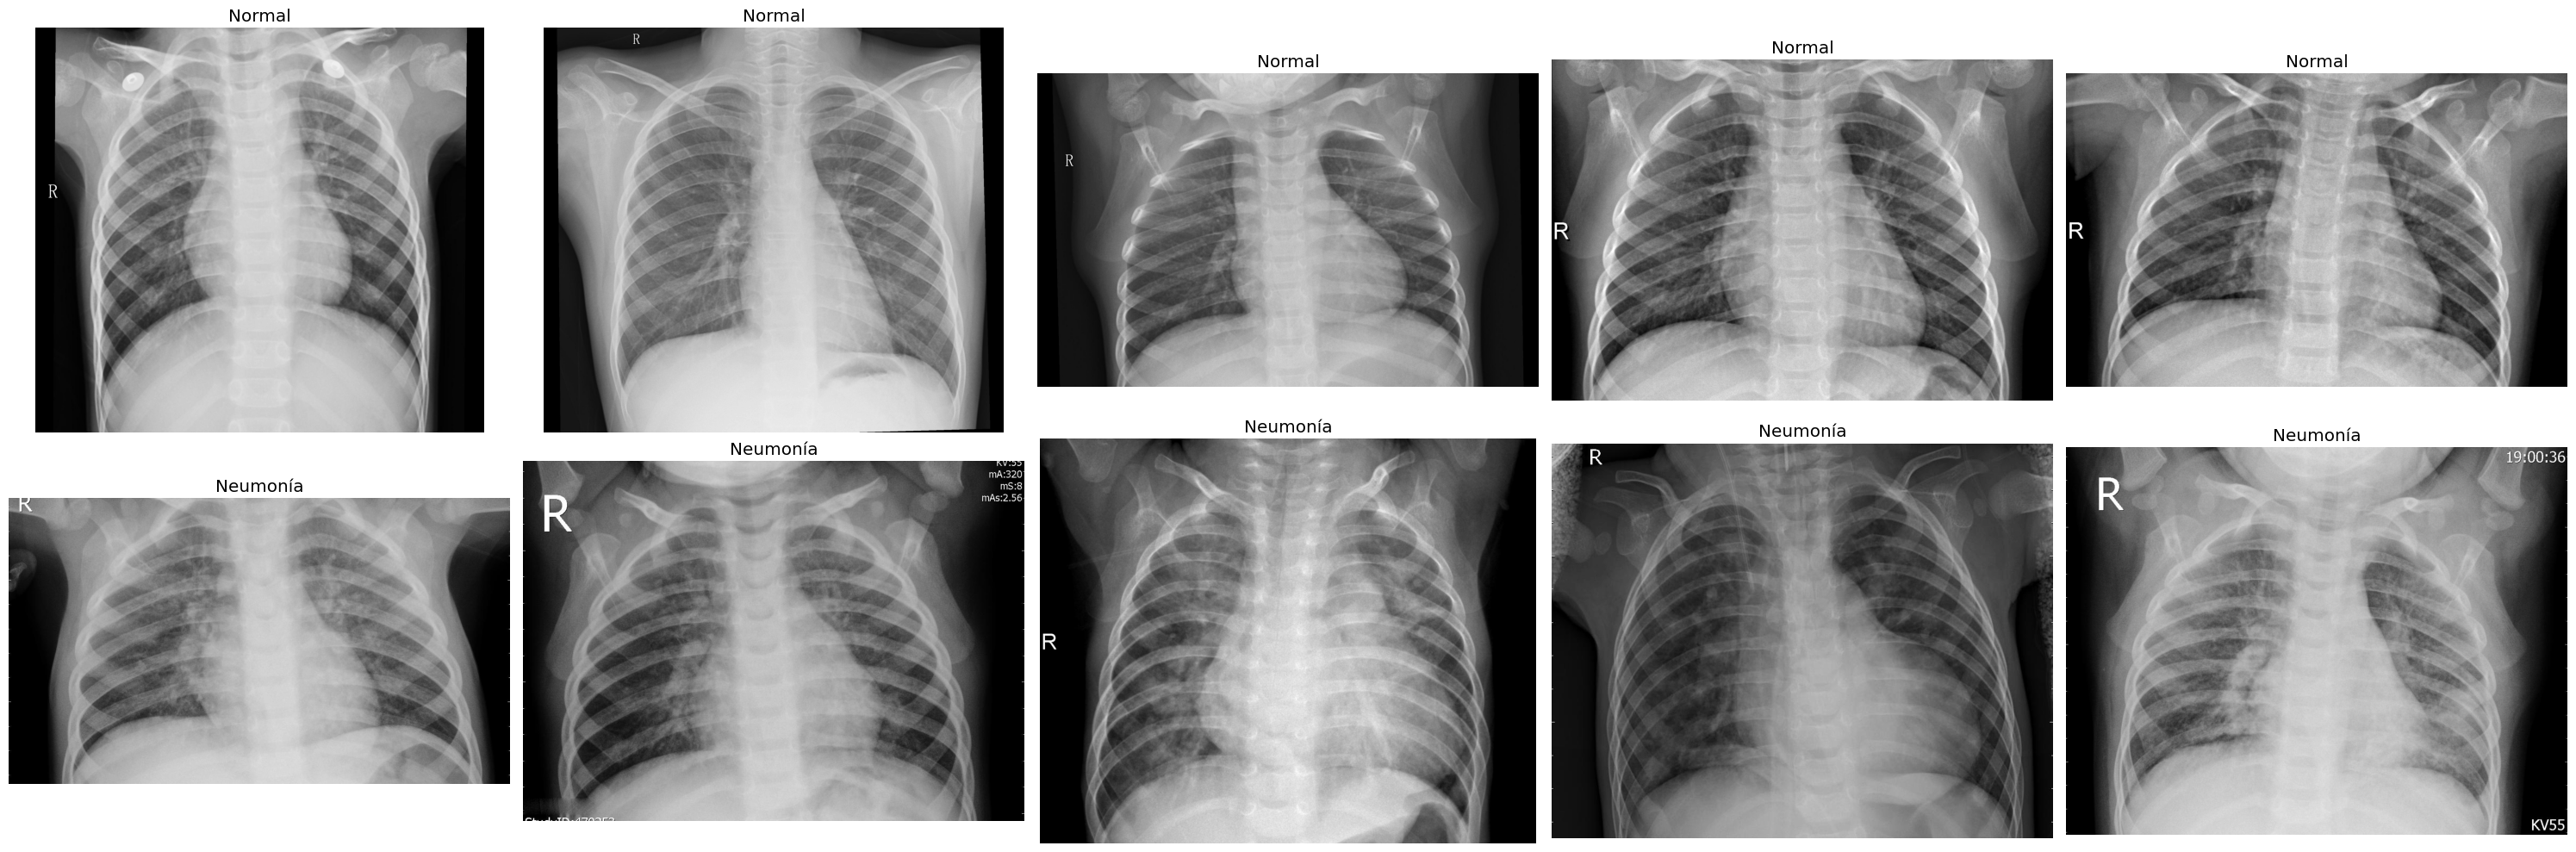

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for i, imagen_path in enumerate(samples):
        fila = i // 5
        columna = i % 5

        imagen = Image.open(imagen_path)
        axs[fila, columna].imshow(imagen, cmap='gray')
        axs[fila, columna].axis('off')

        if i < 5:
            axs[fila, columna].set_title("Normal")
        else:
            axs[fila, columna].set_title("Neumonía")

plt.tight_layout()
plt.show()

Como vimos anteriormente, nuestro dataset cuenta con 5,863 imágenes, vamos a visualizar como están distribuidas.

train_NORMAL: contiene 1341 imágenes
train_PNEUMONIA: contiene 1500 imágenes
test_NORMAL: contiene 234 imágenes
test_PNEUMONIA: contiene 390 imágenes
val_NORMAL: contiene 8 imágenes
val_PNEUMONIA: contiene 8 imágenes


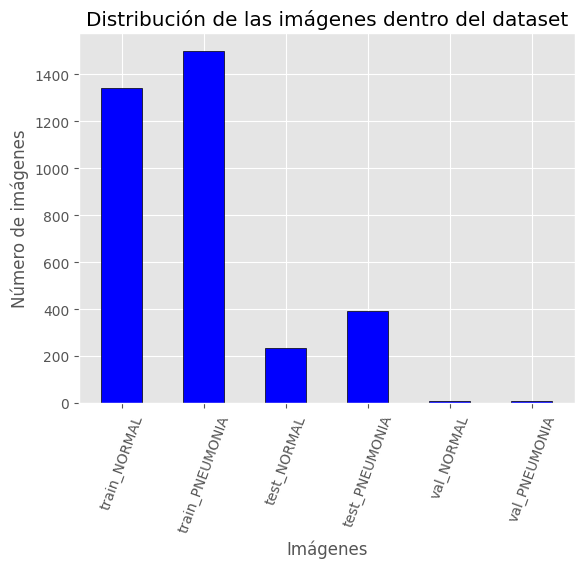

In [ ]:
x_label = "Imágenes"
y_label = "Número de imágenes"
title = "Distribución de las imágenes en el dataset"
visualize_dataset_distribution(dataset=dataset, x_label=x_label, y_label=y_label, title=title)

# Preprocesando el dataset

Con conjuntos de datos de imágenes en aplicaciones como Visión por Computadora, casi siempre es normal preprocesar el conjunto de datos redimensionando, reformateando y/o normalizando las imágenes para que los valores de píxeles estén entre 0 y 1. Aquí redimensionamos las imágenes a una forma de (224,224,3) para que tengan una altura de 224 píxeles, un ancho de 224 píxeles y 3 canales de color, es decir, RGB. Estas dimensiones deben ser coherentes con la entrada de nuestra Red Neuronal Convolucional, como veremos más adelante. También dividimos los valores individuales de los píxeles por 255 para que estén en el intervalo [0,1].

In [ ]:
def transform_dataset(normal_path:str, pneumonia_path:str):
  # Routine to convert and return the X and y datasets as np.ndarrays after some preprocessing
  X, y = [], []
  for img in tqdm(glob(os.path.join(normal_path, "*.jpeg"))):
    img = cv2.imread(str(img))
    # Transform each stock image into a 224x224 RGB image and
    # then into a vector of the same size but normalized between 0 and 1
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
      img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    X.append(img)

  initial = len(X)
  # Target labels -> 1 = Pneumonia, 0 = Normal
  y_a = np.zeros(initial)

  for img in tqdm(glob(os.path.join(pneumonia_path, "*.jpeg"))):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
      img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    X.append(img)

  final = len(X)
  y = np.concatenate((y_a, np.ones(final-initial)))
  y = np.reshape(y, (y.shape[0],1))
  X = np.array(X)
  return X, y

In [ ]:
# Generamos los conjuntos
X_train, y_train = transform_dataset(normal_path=train_NORMAL, pneumonia_path=train_PNEUMONIA)
X_test, y_test = transform_dataset(normal_path=test_NORMAL, pneumonia_path=test_PNEUMONIA)
X_val, y_val = transform_dataset(normal_path=val_NORMAL, pneumonia_path=val_PNEUMONIA)

100%|██████████| 8/8 [00:00<00:00, 113.29it/s]


A continuación aplicaremos el método de convert_to_tensor, el cual convierte arreglos de numpy en vectores, los cuales nos servirán de entrada para nuestro modelo de aprendizaje.

In [ ]:
# Visualizamos las formas de nuestros conjuntos
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)
X_val = tf.convert_to_tensor(X_val)
y_val = tf.convert_to_tensor(y_val)
print("X_train has shape ", X_train.shape)
print("y_train has shape ", y_train.shape)
print("X_test has shape ", X_test.shape)
print("y_test has shape ", y_test.shape)
print("X_val has shape ", X_val.shape)
print("y_val has shape ", y_val.shape)

X_train has shape  (5216, 224, 224, 3)
y_train has shape  (5216, 1)
X_test has shape  (624, 224, 224, 3)
y_test has shape  (624, 1)
X_val has shape  (16, 224, 224, 3)
y_val has shape  (16, 1)


# Creación de nuestro modelo

La arquitectura que usaremos en este proyecto, así como valores asociados y parámetros se basan en el siguiente artículo: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7903219/

Es un artículo muy interesante, ya que se enfoca primeramente en la detección vía rayos X de pacientes con Covid 19.

El uso de un modelo diseñado para detectar casos de COVID-19 en radiografías para la detección de neumonía se puede justificar debido a ciertas similitudes en los patrones radiológicos observados en ambos casos. La neumonía es una inflamación del tejido pulmonar que puede ser causada por diversas condiciones, incluyendo infecciones virales y bacterianas. En algunos casos, las radiografías de pacientes con neumonía muestran características similares a las observadas en radiografías de pacientes con COVID-19, como opacidades pulmonares o consolidación del tejido.

Si bien el modelo puede haber sido inicialmente diseñado para detectar casos de COVID-19, su capacidad para identificar patrones radiológicos anormales en las radiografías pulmonares puede ser aplicada de manera más amplia en la detección de otras enfermedades pulmonares, incluyendo la neumonía. Al entrenar el modelo con un conjunto de datos que incluye casos de neumonía y utilizar técnicas de aprendizaje automático, el modelo puede aprender a reconocer los patrones característicos asociados con la neumonía en las radiografías.

Es importante tener en cuenta que, si bien el modelo puede proporcionar resultados prometedores en la detección de neumonía, es fundamental realizar evaluaciones adicionales y validar los resultados obtenidos con pruebas clínicas y la opinión de expertos médicos.



In [ ]:
def model(input_shape:tuple=(224,224,3), classes=1, initializer=glorot_uniform):
  # Routine to define the model architecture here

  # Define the input to be a tensor of shape input_shape
  input = Input(input_shape)

  # First hidden layer
  X = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = initializer(seed=0))(input)
  X = Dropout(rate=0.2)(X)
  X = MaxPooling2D((2,2))(X)

  # Second hidden layer
  X = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = initializer(seed=0))(X)
  X = Dropout(rate=0.2)(X)
  X = MaxPooling2D((2,2))(X)

  # Third hidden layer
  X = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = initializer(seed=0))(X)
  X = Dropout(rate=0.2)(X)
  X = MaxPooling2D((2,2))(X)

  # Output layer
  X = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = initializer(seed=0))(X)
  X = Dropout(rate=0.2)(X)
  X = Flatten()(X)
  X = Dense(units=2048, activation='relu')(X)
  X = Dropout(rate=0.2)(X)
  X = Dense(units=1024, activation='relu')(X)
  X = Dropout(rate=0.2)(X)
  X = Dense(units=512, activation='relu')(X)
  X = Dropout(rate=0.2)(X)
  output = Dense(classes, activation='sigmoid', kernel_initializer = glorot_uniform(seed=0))(X)

  # Create model
  model = Model(inputs = input, outputs = output)
  return model

In [ ]:
# Let's build the model and look at its summary
XNet = model(input_shape=(224,224,3), initializer=glorot_uniform)
XNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 64)      0         
                                                             

A continuación vamos a definir los siguientes parámetros:



*   **BATCH_SIZE:** define la cantidad de ejemplos de entrenamiento que se recorren en una iteración o paso del proceso de entrenamiento.
*   **EPOCHS:** define el número total de pasadas completas por todo el conjunto de entrenamiento.
*   **optimizer:** El optimizador Adam se utiliza para la retropropagación, con el fin de ajustar los pesos de todas las neuronas en la red, con una tasa de aprendizaje de 0.0001 y una tasa de decaimiento de 1e-5.
*   **EarlyStopping:** Se utiliza EarlyStopping para detener el proceso de entrenamiento antes si la brecha de generalización, es decir, la diferencia entre la pérdida de entrenamiento y la pérdida de validación, comienza a aumentar. Esta tendencia es una indicación de sobreajuste, y EarlyStopping se utiliza para prevenir el sobreajuste.
*   **ModelCheckpoint: ** supervisa la precisión de validación durante el proceso de entrenamiento y es responsable de guardar los pesos del modelo que mejor desempeño ha tenido.
*   **Modelo XNet:** El modelo XNet se compila con una función de pérdida de entropía cruzada binaria, ya que esta es una tarea de clasificación binaria.


In [ ]:
# Define the optimizer and other hyperparameters and metrics and compile the model
BATCH_SIZE = 32
EPOCHS = 10
checkpoint_filepath = "best_model"
optimizer = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor = 'val_accuracy', mode = "max", save_best_only=True, save_weights_only=True)
XNet.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [ ]:
num_training_steps = X_train.shape[0]//BATCH_SIZE
num_validation_steps = len(X_val)
print("Number of training steps: ", num_training_steps)
print("Number of validation steps: ", num_validation_steps)

Number of training steps:  163
Number of validation steps:  16


In [ ]:
history = XNet.fit(
    x = X_train,
    y = y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    steps_per_epoch = num_training_steps,
    validation_data = (X_val, y_val),
    callbacks = [early_stopping, checkpoint]
    )

Epoch 1/10
163/163 [==============================] - 68s 332ms/step - loss: 0.2621 - accuracy: 0.8928 - val_loss: 0.3189 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 22s 135ms/step - loss: 0.0907 - accuracy: 0.9659 - val_loss: 0.2938 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 22s 136ms/step - loss: 0.0781 - accuracy: 0.9730 - val_loss: 0.5172 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 22s 136ms/step - loss: 0.0560 - accuracy: 0.9808 - val_loss: 0.3410 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 23s 139ms/step - loss: 0.0482 - accuracy: 0.9826 - val_loss: 0.2462 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 37s 227ms/step - loss: 0.0472 - accuracy: 0.9835 - val_loss: 0.1045 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 23s 138ms/step - loss: 0.0361 - accuracy: 0.9873 - val_loss: 0.2545 - val_ac

In [ ]:
# Load the weights for the best performing model based on the set requirements
XNet.load_weights("best_model")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
XNet.save("/content/drive/MyDrive/Bootcamp/xnet_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

XNet = load_model("/content/drive/MyDrive/Bootcamp/xnet_model.h5")

In [ ]:
# Evaluation on the test set
test_loss, test_score = XNet.evaluate(
    X_test,
    y_test,
    batch_size=BATCH_SIZE)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

20/20 [==============================] - 9s 35ms/step - loss: 0.6989 - accuracy: 0.7708
Loss on test set:  0.6988717317581177
Accuracy on test set:  0.7708333134651184


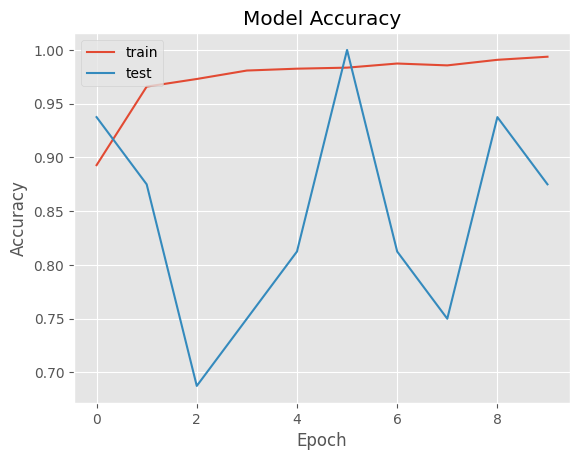

In [ ]:
# Lets plot the model's history including the confusion matrix

# Graficamos la exactitud de nuestro modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

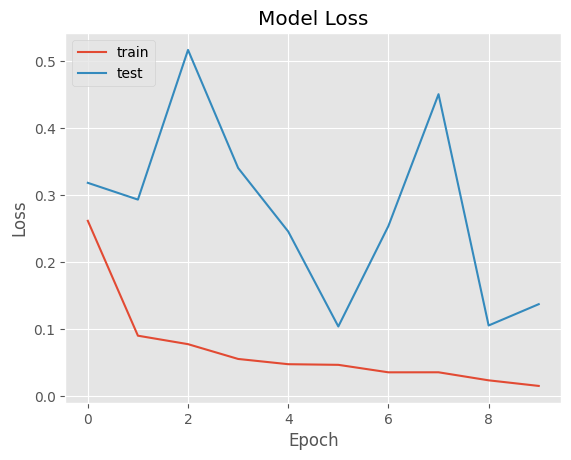

In [ ]:
# Graficamos la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Nuestro modelo nos dió una exactitud del 77%.
Ahora graficaremos la matriz de confusión  y obtendremos las métricas de precisión y exhaustividad (recall).



*   **precisión:** La precisión determina qué proporción de inferencias positivas fueron realmente correctas.
*   **exhaustividad:** determina qué proporción de positivos reales se inferieron correctamente como correctos.



20/20 [==============================] - 1s 24ms/step


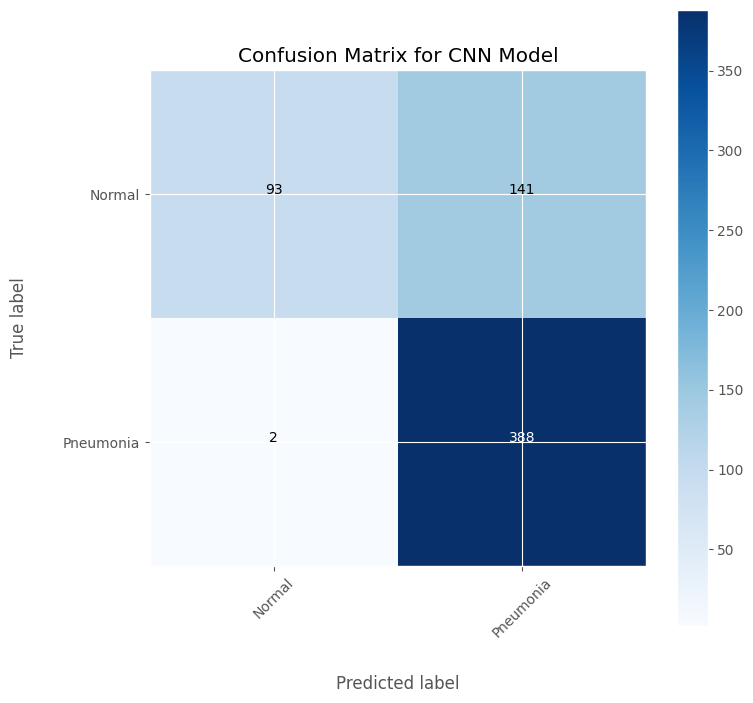

Recall of the model is 0.99
Precision of the model is 0.73


In [ ]:
y_pred = XNet.predict(X_test)
y_pred = (y_pred > 0.5)
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [0. , 1.])
plot_confusion_matrix_self(cnf_matrix, classes = ["Normal" , "Pneumonia"], title = "Confusion Matrix for CNN Model", cmap = plt.cm.Blues)
plt.show()

# Calculate Precision and Recall
tn, fp, fn, tp = cnf_matrix.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

# Testeo del modelo

In [ ]:
dataset["test_PNEUMONIA"][0]

'/content/chest_xray_pneumonia/chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg'

In [ ]:
img = cv2.imread(dataset["test_NORMAL"][89])
img = cv2.resize(img, (224,224))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255.
X = np.expand_dims(img, axis=0)
X = np.array(X)
X = tf.convert_to_tensor(X)
y = XNet.predict(X, batch_size = 32)

if y[0] > 0.5:
  print('La imagen agregada es neumonia con {}'.format(y[0]))
else:
  print('La imagen agregada son pulmones sanos con {}'.format(y[0]))

1/1 [==============================] - 0s 34ms/step
La imagen agregada son pulmones sanos con [0.12154039]
